In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [5]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2
)

X_train.shape, X_test.shape

((712, 3), (179, 3))

## Using pandas

In [10]:
X_train["Age_99"] = X_train["Age"].fillna(99)
X_train["Age_minus1"] = X_train["Age"].fillna(-1)

X_train.sample(10)

,Age,Fare,Family,Age_99,Age_minus1
77,NaN,8.0500,0,99.0,-1.0
150,51.0,12.5250,0,51.0,51.0
223,NaN,7.8958,0,99.0,-1.0
245,44.0,90.0000,2,44.0,44.0
679,36.0,512.3292,1,36.0,36.0
647,56.0,35.5000,0,56.0,56.0
515,47.0,34.0208,0,47.0,47.0
855,18.0,9.3500,1,18.0,18.0
320,22.0,7.2500,0,22.0,22.0
811,39.0,24.1500,0,39.0,39.0


In [17]:
X_train["Fare_999"] = X_train["Fare"].fillna(999)
X_train["Fare_minus1"] = X_train["Fare"].fillna(-1)

X_train.sample(10)

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_909,Fare_999
449,52.0,30.5000,0,52.0,52.0,30.5000,30.5000,30.5000,30.5000
330,NaN,23.2500,2,99.0,-1.0,23.2500,23.2500,23.2500,23.2500
532,17.0,7.2292,2,17.0,17.0,7.2292,7.2292,7.2292,7.2292
747,30.0,13.0000,0,30.0,30.0,13.0000,13.0000,13.0000,13.0000
145,19.0,36.7500,2,19.0,19.0,36.7500,36.7500,36.7500,36.7500
700,18.0,227.5250,1,18.0,18.0,227.5250,227.5250,227.5250,227.5250
443,28.0,13.0000,0,28.0,28.0,13.0000,13.0000,13.0000,13.0000
221,27.0,13.0000,0,27.0,27.0,13.0000,13.0000,13.0000,13.0000
281,28.0,NaN,0,28.0,28.0,999.0000,-1.0000,999.0000,999.0000
725,20.0,8.6625,0,20.0,20.0,8.6625,8.6625,8.6625,8.6625


### After Imputing you need to chech few things

#### 1. After mean and median imputation the variance will shrink
#### We need to make sure it doesn't shrink too much

In [18]:
print("Original Age variable variance: ", X_train["Age"].var())
print("Age variance after 999 imputation: ", X_train["Age_99"].var())
print("Age variance after -1 imputation: ", X_train["Age_minus1"].var())

print("Original Fare variable variance: ", X_train["Fare"].var())
print("Fare variance after 999 impuatation: ", X_train["Fare_999"].var())
print("Fare variance after -1 imputation : ", X_train["Fare_minus1"].var())

Original Age variable variance:  204.34951339046142
Age variance after 999 imputation:  951.7275570187188
Age variance after -1 imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare variance after 999 impuatation:  47219.202652176304
Fare variance after -1 imputation :  2378.5676784883494


#### 2. Second thing to notice is change in distribution

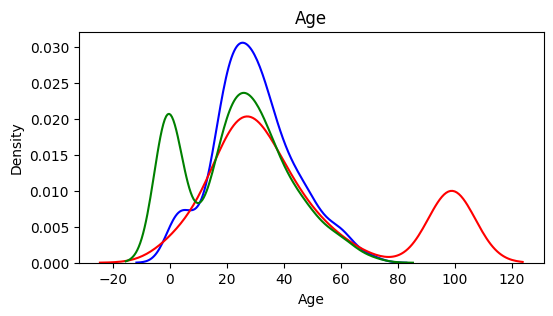

In [20]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 3))

sns.kdeplot(X_train["Age"], ax=ax1, color="blue")
sns.kdeplot(X_train["Age_99"], ax=ax1, color="red")
sns.kdeplot(X_train["Age_minus1"], ax=ax1, color="green")

ax1.set_title("Age")

plt.show()

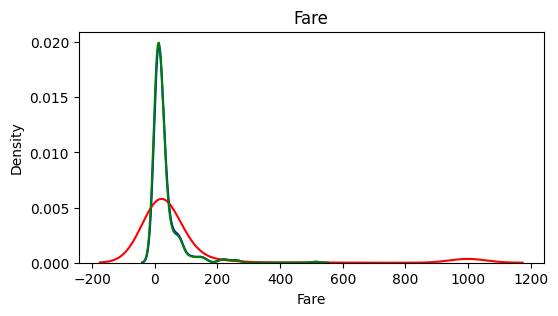

In [21]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 3))

sns.kdeplot(X_train["Fare"], ax=ax1, color="blue")
sns.kdeplot(X_train["Fare_999"], ax=ax1, color="red")
sns.kdeplot(X_train["Fare_minus1"], ax=ax1, color="green")

ax1.set_title("Fare")

plt.show()

#### 3. Covariance

In [22]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_909,Fare_999
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188,162.793430,162.793430
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989,11.528625,11.528625
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400,-159.931663,-159.931663
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141,257.379887,257.379887
Fare_99,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982,47219.202652,47219.202652
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678,762.474982,762.474982
Fare_909,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982,47219.202652,47219.202652
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982,47219.202652,47219.202652


#### 4. Correlation

In [23]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_909,Fare_999
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585,0.051179,0.051179
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233,0.032079,0.032079
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687,-0.023857,-0.023857
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514,0.066411,0.066411
Fare_99,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946,1.000000,1.000000
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000,0.071946,0.071946
Fare_909,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946,1.000000,1.000000
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946,1.000000,1.000000


## Using sklearn

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2
)

For arbitrary imputation you set stratergy 'constant' when creating simpleimputer

In [27]:
imputer1 = SimpleImputer(strategy="constant", fill_value=99)
imputer2 = SimpleImputer(strategy="constant", fill_value=999)

In [30]:
trf = ColumnTransformer([
    ("imputer1", imputer1, ["Age"]),
    ("imputer2", imputer2, ["Fare"])
], remainder="passthrough")

In [31]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,99


In [32]:
X_train_transformed = trf.transform(X_train)
X_test_transformed = trf.transform(X_test)

In [34]:
pd.DataFrame(X_train_transformed, columns=X_train.columns)

,Age,Fare,Family
0,40.0,27.7208,0.0
1,4.0,16.7000,2.0
2,47.0,9.0000,0.0
3,9.0,31.3875,6.0
4,20.0,9.8458,0.0
...,...,...,...
707,30.0,8.6625,0.0
708,99.0,8.7125,0.0
709,71.0,49.5042,0.0
710,99.0,221.7792,0.0
